In [1]:
# 正态分布
using Compat, Random, Distributions
Random.seed!(123) # Setting the seed

using StatsPlots

# StatsPlots 之后不需要再使用 Plots
# using Plots 

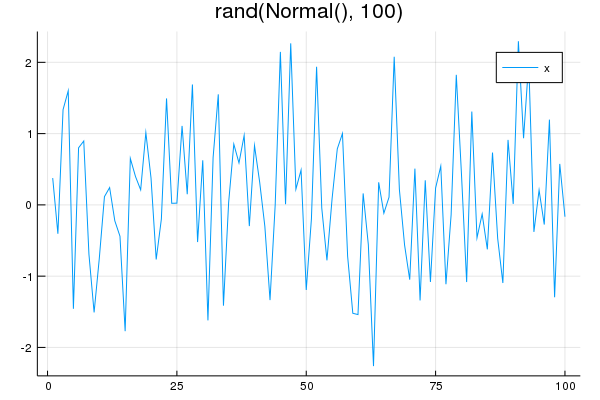

In [3]:
# 正态分布 μ=0, σ=1
d = Normal()

# 按照正态分布，随机生成 100 个；注意，随机是平均
x = rand(d, 100)

# 设置后端
gr(fmt=:png);

# 横轴是 1~100，纵轴是 x 的值；注意，这里并不是正态分布的钟形曲线
# 这里只是画出了 100 个点，并连了起来
plot(x, label=["x"], title="rand(Normal(), 100)")

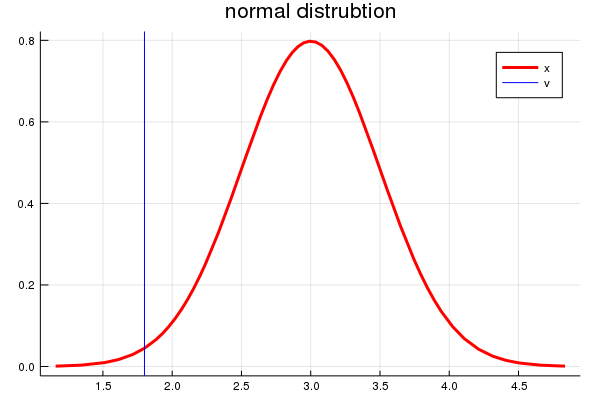

In [73]:
# 这才是钟形线
plot(Normal(3, 0.5), label=["x"], lw=3, color="red", title="normal distrubtion")
plot!([1.8], label="v", color="blue", seriestype="vline")

In [47]:
# 生成一个正态分布
d = Normal(3, 0.5)

Normal{Float64}(μ=3.0, σ=0.5)

In [55]:
# 获取正态分布的参数
params(d)

(3.0, 0.5)

In [54]:
(typeof(d), supertype(typeof(d)))

(Normal{Float64}, Distribution{Univariate,Continuous})

In [53]:
# 均值，标准差，方差(标准差的平方)
(mean(d), std(d), var(d))

(3.0, 0.5, 0.25)

In [66]:
# cumulative probability, 累积概率，左边部分的面积
# complementary cumulative, 右边部分的面积
# 正态分布 是 连续变量，所以是 cdf，是积分值(对应图形的左侧面积)；
v = 1.8
(cdf(d, v), ccdf(d, v))

(0.008197535924596131, 0.9918024640754038)

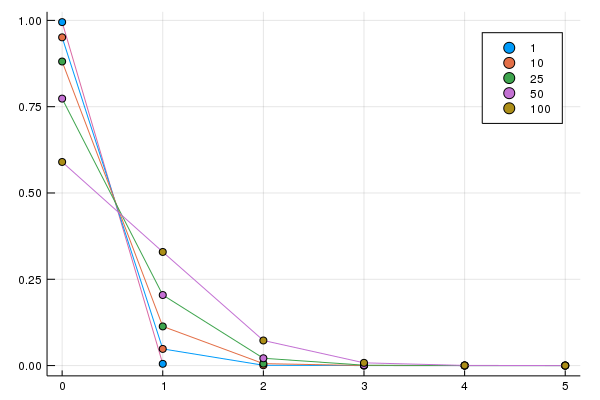

In [126]:
# 超几何分布，是 离散变量
# 应用场景：质检策略
# 发布的合格率为 99.5%，每次送货 5000 个；
# 质检规则：每次抽取 25 个，发现有 1 个不合格，这种情况的概率多少？
# 设定：不合格的为成功，
# 这是不放回的超几何分布
total = 1000
r = 0.005
ns = round(r * total)
nf = total - ns 

# 分别不同的样本
cnt = [1 10 25 50 100]
h = Hypergeometric.(ns, nf, cnt)

# 概率曲线
plot(h, label=cnt)

In [127]:
# 策略1：批量检测（取决于检测设备；或者抽样设备）
# 抽取 25 个，如果不合格数量 大于等于2，则发布的合格率为假，直接退货；
# 如果不合格数量 等于1，则还需再进行一次抽验，如果合格，则收货；如果不合格，直接退货；
# 如果不合格数量 等于0，直接收货；

# 为什么是抽取 25 个？因为：1~0.5% 的抽样率； 
# 而且，如果只抽取 10 个，那么只要有 1 个不合格，那么就能判定整批次不合格，对供应商苛刻；极端情况，只抽样一个，而且还不合格；
# 抽样增加到 50 个，和 25 个没区别（1个不合格时，还需要再检验；2个不合格时，直接拒绝）；
# 抽样增加到 100 个，如果有 2个不合格，还需要再进行下一轮检验；抽样 100个 工作量有些大；


# 策略2：一个一个检验，碰到不合格就停；也即：
# 检验第一个，如果不合格，直接退；否则检验第二个，如果不合格，直接退；否则继续检验下一个；
# 一直到抽样第 5 个，如果不合格(2.5%)，不直接退，而是继续抽样；如果还碰到不合格，直接退；如果抽样到 25*2 个，没有不合格的，则接受；
# 如果抽样到 25 个都合格，则接受；


In [130]:
# 一个一个检验
cnt = 1:25
h = Hypergeometric.(ns, nf, cnt)

# 碰到一个的概率，注意，这里是 pdf，不是 cdf，如果是 cdf，那含义是 0,1 的总概率
pdf.(h, 1)

25-element Array{Float64,1}:
 0.005000000000000006
 0.009959959959959963
 0.01488006042114259 
 0.019760481441918543
 0.02460140259837247 
 0.029403002984909117
 0.034165461214859166
 0.03888895542108557 
 0.043573663256589325
 0.04821976189511567 
 0.05282742803176004 
 0.0573968378835742  
 0.06192816719017212 
 0.06642159121433626 
 0.07087728474262343 
 0.07529542208597073 
 0.07967617708030175 
 0.08401972308713299 
 0.08832623299417873 
 0.09259587921595867 
 0.09682883369440251 
 0.10102526789945679 
 0.10518535282969106 
 0.10930925901290307 
 0.11339715650672577 

In [134]:
# 碰到两个的概率
pdf.(h, 2);

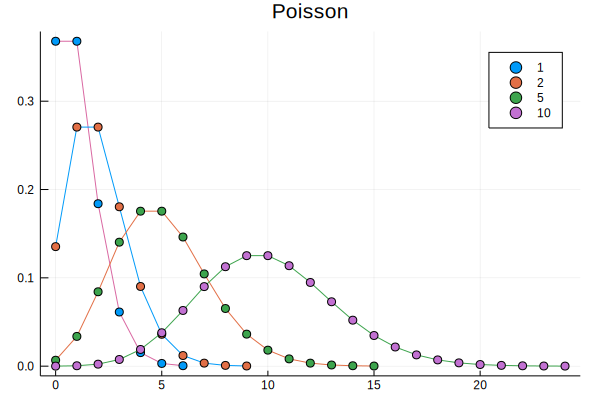

In [4]:
# 上面是 超几何分布，应用场景是制定质检策略；
# 下面是 Poisson 分布，用以模拟公共汽车，以及平均等待时间
lambda = [1 2 5 10 ]
d = Poisson.(lambda)

# 比如：lambda=2，曲线表示的是发生 0次，1次，2次，3次，...，8次的概率
plot(d, label=lambda, title="Poisson")

In [147]:
# lambda=2, 发生 5次 的概率
pdf(d[2], 5)

0.03608940886309671

In [151]:
# 均值、方差 都是 lambda
(mean(d[2]), std(d[2]), var(d[2]))

(2.0, 1.4142135623730951, 2.0)

In [25]:
# 模拟公共汽车：每小时2班（平均30分钟一班），模拟 10000 班
n = 10000
maxtime = n * 30 

# 每趟车到达的时间
arrivals = sort(maxtime .* rand(n));

In [26]:
# 验证：是否是每隔 30 分钟一辆车，注意：这里是平均，会有间隔很长的情况出现，参见下图
intervals = diff(arrivals)
mean(intervals)

29.98854572066614

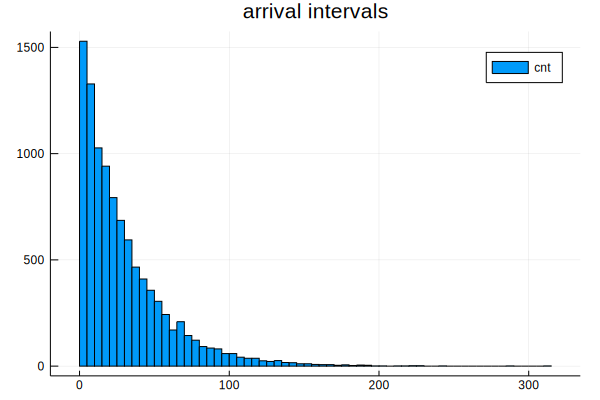

In [42]:
# 横轴：前后两辆车的间隔时间，纵轴：对应的次数；注意：这里有间隔很久的车(300分钟，极个别情况)，正好后后面的 乘客等待很久 相对应
histogram(intervals, label="cnt", title="arrival intervals")

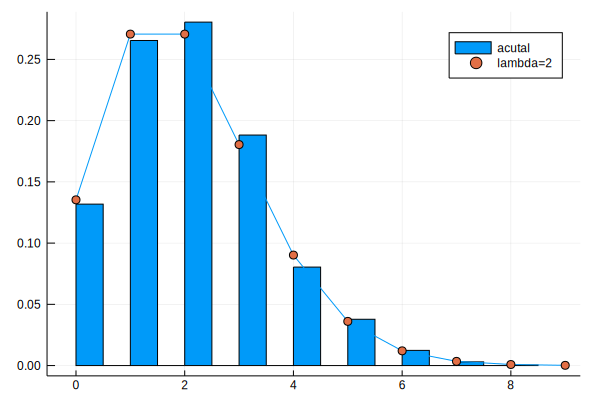

In [38]:
# 验证：验证是否符合 poisson(2) 分布，10000次车，5000 个小时
h = range(60,step=60, stop=maxtime)

# # 计算每小时的到达的车次：到达时间在本期间内
# # TODO: 应该有更高效的函数
# hs = zeros(5000)
# last = 1
# for i in 1:5000
#     for j in last:10000
#         if h[i] >= arrivals[j]
#             hs[i] += 1
#         else
#             last = j 
#             break
#         end 
#     end     
# end 

# # 按数量占比，画直方图，和 poisson 吻合
# histogram(hs, normalize = :probability, label="acutal")
# plot!(Poisson(2), label="lambda=2")


# 优化：利用 searchsortedfirst 的前后两个的差
function bigIndex(hour)
    searchsortedfirst(arrivals, hour)
end

# boardcast
hs = bigIndex.(h)

# 前后两个的差，即为这个小时内到达的车
hsd = diff(hs)

# 密度图形
histogram(hsd, normalize = :probability, label="acutal")
plot!(Poisson(2), label="lambda=2")

In [39]:
# 模拟乘客到达，随机到达
persons = sort(maxtime .* rand(1000000))

# 计算每个乘客的等待时间：乘客到达时间 - 下一班车到达时间
np = size(persons,1)
waits = zeros(np);

# # searchsortedfirst 第二个参数只能是 scalar，这里只能用循环
# i = 1
# while i <= np
#     f = searchsortedfirst(arrivals, persons[i])
#     if f > size(arrivals, 1) 
#         waits[i] = 0
#     else 
#         waits[i] = arrivals[f] - persons[i]   
#     end 
#     i = i + 1
# end 

# # 平均等待时间是 30 分钟
# mean(waits)

# 优化：通过自定义函数，实现 vectorize 
sizeArr = size(arrivals, 1) 
function calcWait(person)
    f = searchsortedfirst(arrivals, person)
    f <= sizeArr ? arrivals[f] - person : 0 
end 

# boardcast 
waits2 = calcWait.(persons)

# 尽管平均等待时间是 30 分钟，但是分化的也很厉害，和上面车的间隔时间是同样的道理；
mean(waits2)

29.824125644265205

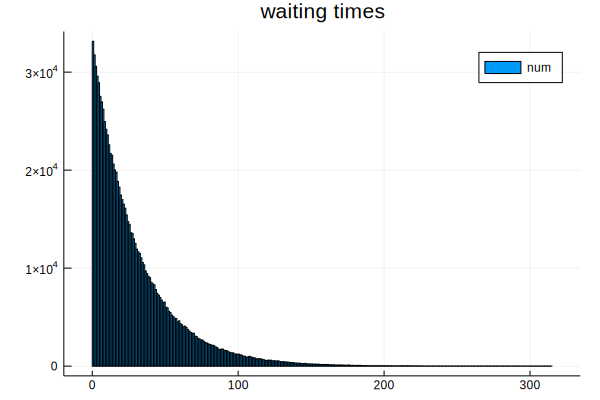

In [43]:
# 横轴：等待时间；纵轴：对应的人数
histogram(waits2, label="num", title="waiting times")